# Framing the Problem - Describe the goal of this report

## Introduction

Numerous factors affect house values, such as location, size, population density, and accessibility to amenities like the seaside. This dataset, which was obtained from Californian housing data, has a number of factors that characterise neighbourhood attributes and how they affect home values. The purpose of this project is to use these variables to develop a predictive model that calculates the median house value in various regions. Urban development, financial research, and real estate planning can all benefit from price prediction. A full understanding of the elements influencing house values is provided by the combination of numerical attributes (like population and total rooms) and categorical data (like proximity to the ocean).

# Getting the Data - hyperlink to the source



Dataset is called "California Housing Prices" and was derived from kaggle.

URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Load Dataset with Pandas

In [ ]:
# load data
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Data Analysis (EDA)

## Explore statistics

In [ ]:
# explore statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Create three Seaborn scatter plots of median house value vs. median income, population and number of households.

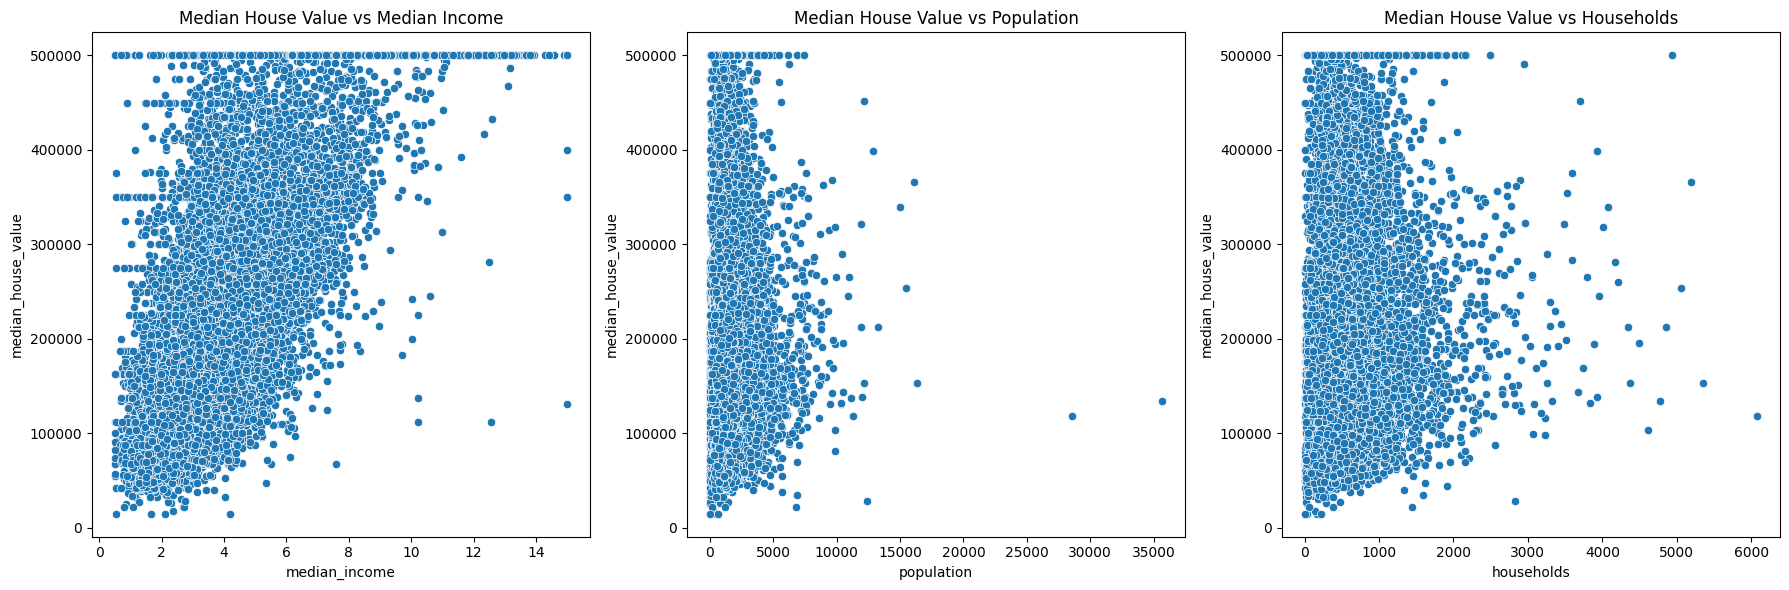

In [ ]:
# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Median House Value vs. Median Income
sns.scatterplot(ax=axes[0], x='median_income', y='median_house_value', data=df)
axes[0].set_title('Median House Value vs Median Income')

# Scatter plot for Median House Value vs. Population
sns.scatterplot(ax=axes[1], x='population', y='median_house_value', data=df)
axes[1].set_title('Median House Value vs Population')

# Scatter plot for Median House Value vs. Households
sns.scatterplot(ax=axes[2], x='households', y='median_house_value', data=df)
axes[2].set_title('Median House Value vs Households')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


### Textual interpretation of the graphs



Median House Value vs. Median Income:  The median house value and median income have a definite positive association. House values typically climb dramatically as median income rises. A potential ceiling on house prices despite increased salaries may be indicated by a few data points at higher income levels where house prices peak. The relationship otherwise seems to be largely linear.



Median House Value vs. Population: The graphic indicates a weak to nonexistent linear link between median house value and population size. Population does not appear to have a consistent, direct impact on property values, despite the large variation in house prices across various population levels.


Median House Value vs. Households: Similarly, there is no significant relationship between the number of households and the median house value. Similar to the population plot, this shows that house values are widely distributed throughout a range of household sizes and that the number of households in an area may not be a reliable indicator of house prices.


## Based on the above, describe the 4 variables used in this lab.


1. **Median House Value** (dependent variable):
   - **Meaning**: The median house price in each area, which we aim to predict.
   - **Range**: Approximately from \$15,000 to \$500,000, with a noticeable ceiling effect at \$500,000.
   - **Characteristics**: It has a strong positive correlation with median income, but little obvious relationship with population and households.

2. **Median Income** (independent variable):
   - **Meaning**: The median income of households in the area.
   - **Range**: Values generally range from 0.5 to 15 (units are scaled).
   - **Characteristics**: Shows a clear positive linear relationship with median house value, indicating that income is a key predictor of house prices.

3. **Population** (independent variable):
   - **Meaning**: The total population in the area.
   - **Range**: Varies widely, from small communities (~10 people) to highly populated areas (40,000+ people).
   - **Characteristics**: No clear correlation with house value. Data is scattered across a wide range of populations.

4. **Households** (independent variable):
   - **Meaning**: The number of households in the area.
   - **Range**: From very small numbers to around 6,000 households.
   - **Characteristics**: Like population, this variable has a wide spread with no discernible pattern in relation to house prices.

These variables capture key socioeconomic and demographic data, with **median income** being the most promising predictor of house prices.

# Run three linear regressions (fitting) between:
- Median house value vs. median income
- Median house value vs. population
- Median house value vs. number of households.

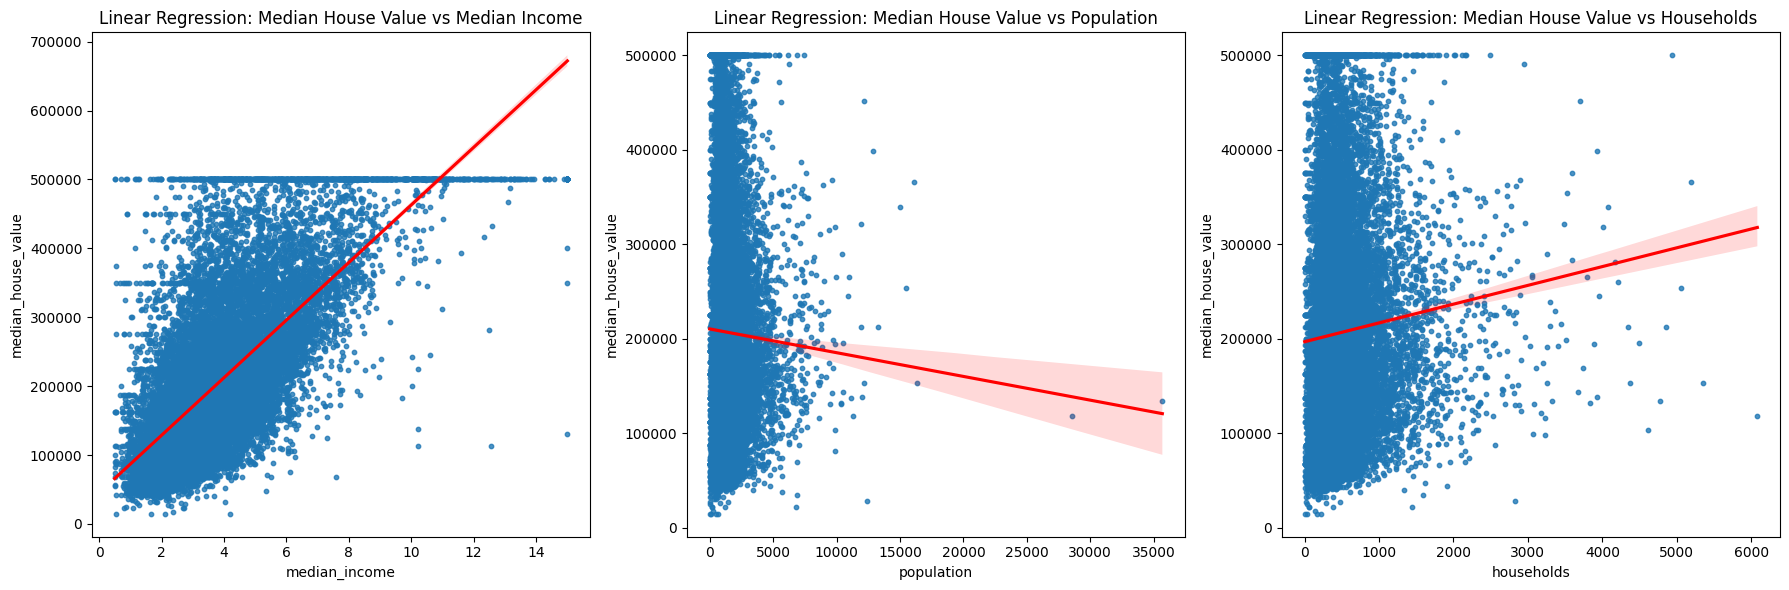

In [ ]:
# Plotting linear regressions using Seaborn's regplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Linear regression for Median House Value vs. Median Income
sns.regplot(ax=axes[0], x='median_income', y='median_house_value', data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
axes[0].set_title('Linear Regression: Median House Value vs Median Income')

# Linear regression for Median House Value vs. Population
sns.regplot(ax=axes[1], x='population', y='median_house_value', data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
axes[1].set_title('Linear Regression: Median House Value vs Population')

# Linear regression for Median House Value vs. Households
sns.regplot(ax=axes[2], x='households', y='median_house_value', data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
axes[2].set_title('Linear Regression: Median House Value vs Households')

# Adjust layout
plt.tight_layout()
plt.show()


# In a single table for all three linear regressions, provide per regression model

- Intercept and slope
- Mean Squared Error
-Mean Absolute Error

 | Variables | Slope | Intercept |
|----------|----------|----------|
| Income vs House value   | 41793.849201896264   | 45085.57670326799   |
| Population vs House value    | -2.5117527746150716   | 210436.2620762733   |
| Households vs House value    | 19.872775155643858   | 196928.57716233088   |

# Plot the resulting line on top of the scatter data for each of the three models, add the line parameters (intercept and slope), MSE and MAE to the graph.

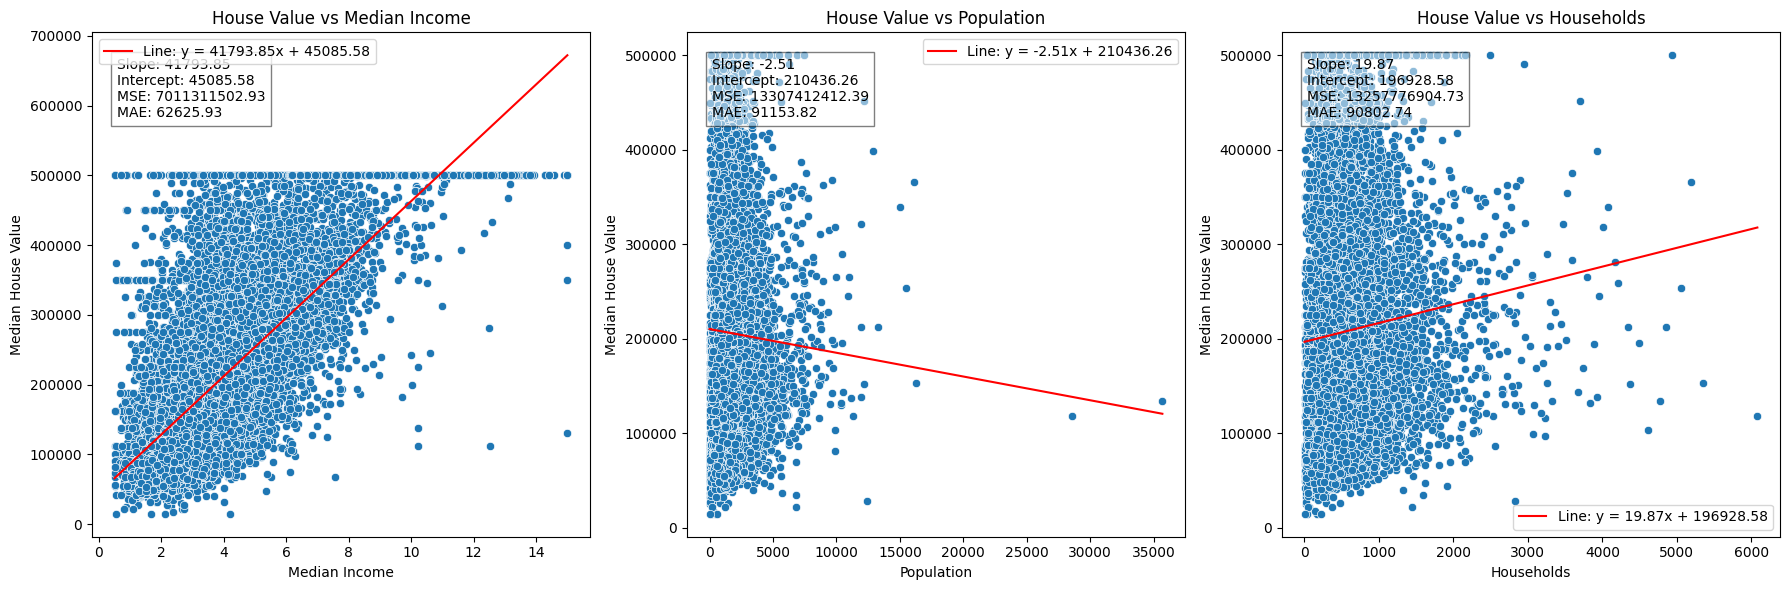

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Helper function to plot linear regression results
def plot_regression(ax, X, y, x_label, title):
    # Reshape X for sklearn and create model
    X_reshaped = X.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X_reshaped, y)

    # Predict values using the model
    y_pred = model.predict(X_reshaped)

    # Calculate MSE and MAE
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    # Plot the scatter and the regression line
    sns.scatterplot(ax=ax, x=X, y=y)
    sns.lineplot(ax=ax, x=X, y=y_pred, color='red', label=f'Line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

    # Add slope, intercept, MSE, MAE to the plot
    ax.text(0.05, 0.95, f"Slope: {model.coef_[0]:.2f}\nIntercept: {model.intercept_:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}",
            transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    # Set labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel('Median House Value')
    ax.set_title(title)

# Median House Value vs Median Income
plot_regression(axes[0], df['median_income'], df['median_house_value'], 'Median Income', 'House Value vs Median Income')

# Median House Value vs Population
plot_regression(axes[1], df['population'], df['median_house_value'], 'Population', 'House Value vs Population')

# Median House Value vs Households
plot_regression(axes[2], df['households'], df['median_house_value'], 'Households', 'House Value vs Households')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


# Summary

Based on the EDA done on this dataset, there is a strong positive correlation between median house value and median income, with house prices increasing as income rises. However, there may be a ceiling at higher income levels. In contrast, the relationships between median house value, population size, and number of households are weak or nonexistent. This suggests that neither population nor household numbers reliably predict property values, as house prices vary widely across different population and household sizes.

# Pushing to github


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
%cd /content/drive/MyDrive/Practical-Lab 1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset

/content/drive/MyDrive/Practical-Lab 1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset


In [10]:
!ls

'Practical-Lab 1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset.ipynb'


In [12]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Practical-Lab 1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset/.git/


In [13]:
!git config --global user.email "messirimiracle@gmail.com"
!git config --global user.name "Messiri4"


In [14]:
!git clone https://github.com/Messiri4/Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset.git


Cloning into 'Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset'...


In [24]:
!cp -r /content/drive/MyDrive/Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset/* .


cp: '/content/drive/MyDrive/Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset/Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset' and './Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset' are the same file
cp: '/content/drive/MyDrive/Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset/Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset.git' and './Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset.git' are the same file
cp: '/content/drive/MyDrive/Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset/Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset.ipynb' and './Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset.ipynb' are the same file


In [26]:
!git add .
!git commit -m "Your commit message"


error: 'Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset.git/' does not have a commit checked out
fatal: adding files failed
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset.git/
	Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset.ipynb
	Practical-Lab-1-Univariate-Linear-Regression-on-the-California-Housing-Prices-Dataset/

nothing added to commit but untracked files present (use "git add" to track)
